In [1]:
import requests
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# API setup
api_key = ""
job_search = "https://api.adzuna.com/v1/api/jobs/gb/search/1"

params = {
    'app_id': '',
    'app_key': api_key,
    'results_per_page': 100,  
    'what': 'IT jobs'
}

result = requests.get(job_search, params=params)

# Check if the request was successful
if result.status_code == 200:
    data = result.json()
    jobs = data.get('results', [])

    # Extract required data
    job_list = []
    for job in jobs:
        title = job.get('title', 'N/A')
        location = job.get('location', {}).get('display_name', 'N/A')
        company = job.get('company', {}).get('display_name', 'N/A')
        salary_min = job.get('salary_min', None)
        salary_max = job.get('salary_max', None)
        description = job.get('description','Not Available')

        # Calculate average salary if possible
        if salary_min and salary_max:
            salary = (salary_min + salary_max) / 2
        elif salary_min:
            salary = salary_min
        elif salary_max:
            salary = salary_max
        else:
            salary = None

        job_list.append([title, location, company, salary, description])

    # Convert to DataFrame
    df = pd.DataFrame(job_list, columns=["Job Title", "Location", "Company", "Salary", "Description"])
    df = df.dropna()  # Remove entries with missing salary

print(tabulate(df, headers='keys', tablefmt='grid'))

+----+-------------------------------+---------------------------------------+-------------------------------------------------+----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Job Title                     | Location                              | Company                                         |   Salary | Description                                                                                                                                                                                                              

C:\Users\magui\AppData\Local\Temp\ipykernel_19620\2867984712.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_locations.index, y=top_locations.values, palette="coolwarm")


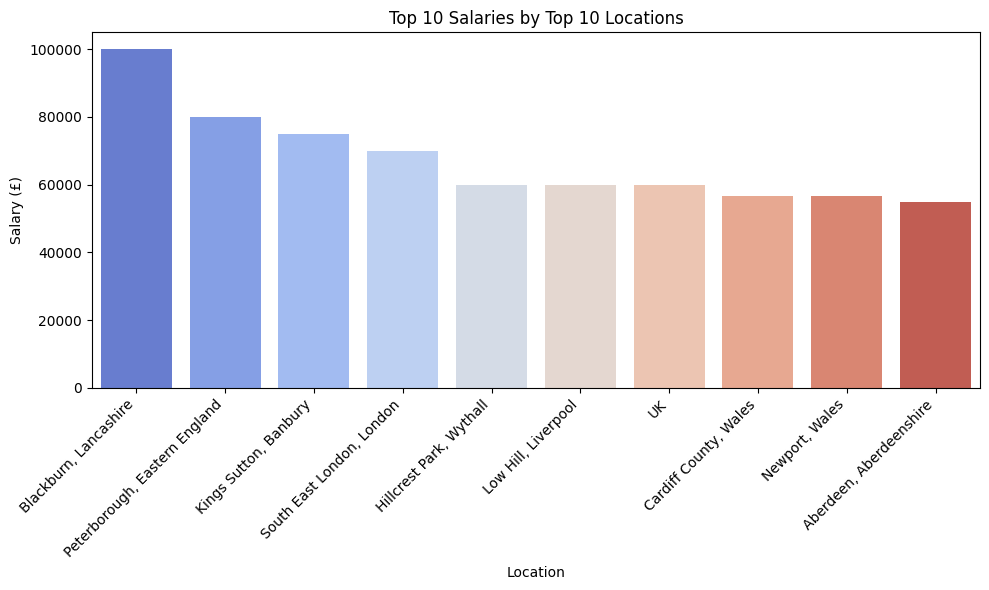

In [2]:
# ---------------------- 1. BAR CHART: Top 10 Salaries by Top 10 Locations ----------------------
# Group by Location to get the maximum salary per location,
# then select the top 10.
top_locations = df.groupby("Location")["Salary"].max().nlargest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_locations.index, y=top_locations.values, palette="coolwarm")
plt.title("Top 10 Salaries by Top 10 Locations")
plt.ylabel("Salary (£)")
plt.xlabel("Location")
# Rotate and align x-axis labels for better readability.
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

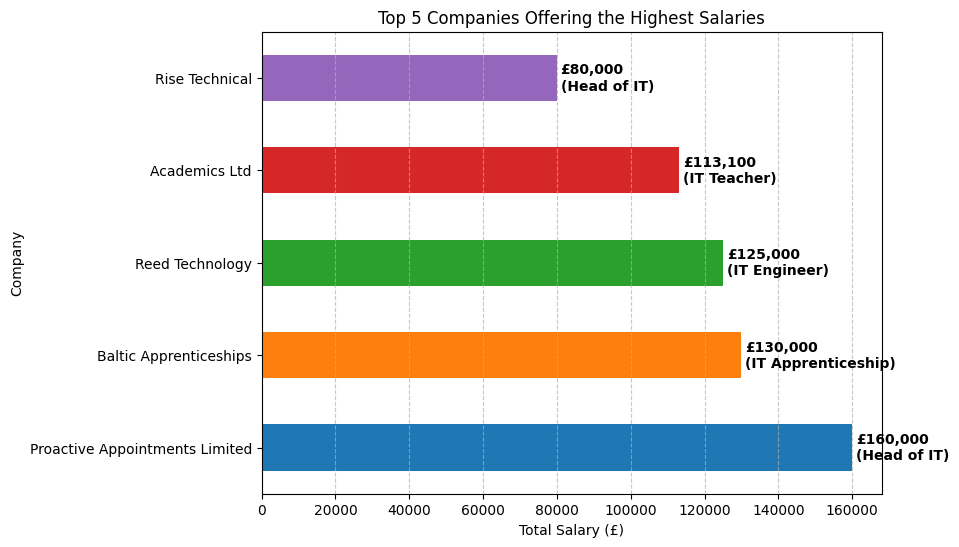

In [3]:
# ---------------------- 2. Top 5 Companies by Maximum Salary ----------------------
# Get top 5 companies with the highest total salaries
top_companies = df.groupby("Company")["Salary"].sum().nlargest(5)

# Create a horizontal stacked bar chart
plt.figure(figsize=(8, 6))
bars = top_companies.plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Add salary labels with job titles
for index, (company, salary) in enumerate(top_companies.items()):
    job_title = df[df["Company"] == company]["Job Title"].values[0]  # Get first job title for company
    plt.text(salary + 1000, index, f"£{int(salary):,}\n({job_title})", va='center', fontsize=10, fontweight='bold')

plt.title("Top 5 Companies Offering the Highest Salaries")
plt.xlabel("Total Salary (£)")
plt.ylabel("Company")
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

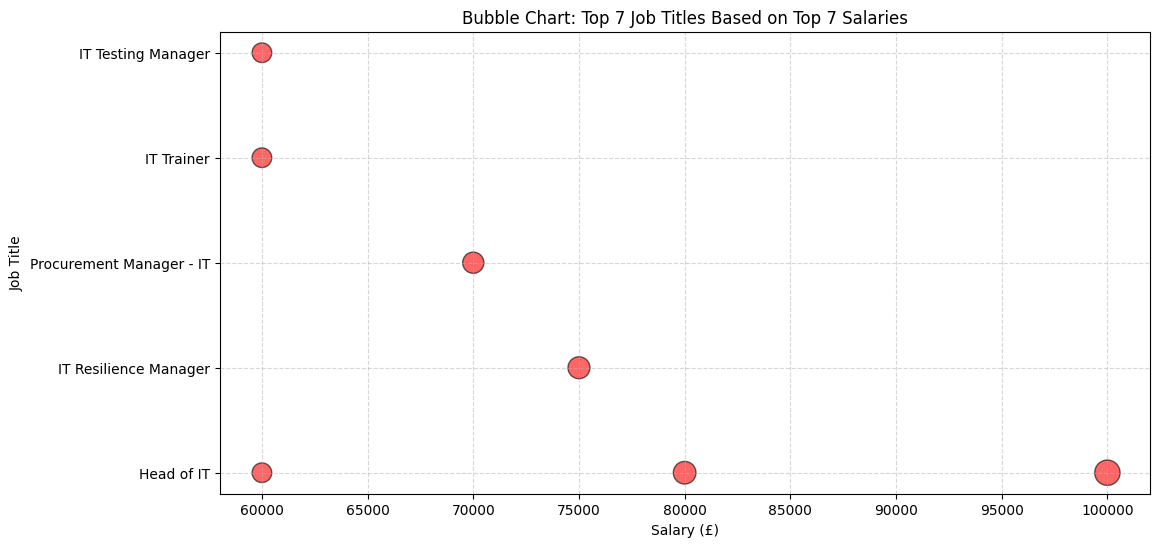

In [4]:
# ---------------------- 3. Top 7 Job Titles based on the top 7 salary ----------------------
# Get top 7 job titles based on the highest salaries
top_titles = df.nlargest(7, "Salary")

# Increase bubble sizes for better visibility
bubble_sizes = top_titles["Salary"] / 300  # Adjusted scaling for larger bubbles

# Create the bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(top_titles["Salary"], top_titles["Job Title"], s=bubble_sizes, alpha=0.6, color="red", edgecolors="black")

plt.title("Bubble Chart: Top 7 Job Titles Based on Top 7 Salaries")
plt.xlabel("Salary (£)")
plt.ylabel("Job Title")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [5]:
# Get top 10 highest-paying job titles
top_jobs = df.nlargest(10, "Salary")[["Job Title", "Salary"]]

# If job descriptions are available, extract required skills
if "Description" in df.columns:
    skills_list = ["Python", "Java", "SQL", "Cloud Computing", "Machine Learning", "Cybersecurity", 
               "Data Analysis", "JavaScript", "DevOps", "Networking", "Linux", "Docker", "Kubernetes",
               "AWS", "Azure", "Agile", "Scrum", "C++", "React", "Django", "Flask", "TensorFlow", "Pandas",
               "AI", "Data Science", "Security", "Software Development", "Full Stack", "Back-end", 
               "Front-end", "Database", "System Administration", "Automation", "Big Data", "Microservices"]
    
    def extract_skills(description):
        found_skills = [skill for skill in skills_list if skill.lower() in description.lower()]
        return ", ".join(found_skills) if found_skills else "Not Available"
    
    top_jobs["Required Skills"] = df.nlargest(10, "Salary")["Description"].apply(extract_skills)

# Display top 10 job titles with skills (if descriptions exist)
print(top_jobs)

                   Job Title    Salary Required Skills
9                 Head of IT  100000.0   Not Available
22                Head of IT   80000.0   Not Available
43     IT Resilience Manager   75000.0              AI
44  Procurement Manager - IT   70000.0              AI
11                Head of IT   60000.0              AI
31                IT Trainer   60000.0              AI
46        IT Testing Manager   60000.0   Not Available
25                IT Teacher   56550.0              AI
26                IT Teacher   56550.0              AI
37      IT Security Engineer   55000.0        Security


In [6]:
from tabulate import tabulate

# Define a list of common IT skills to search for in job descriptions
skills_list = ["Python", "Java", "SQL", "Cloud Computing", "Machine Learning", "Cybersecurity", 
               "Data Analysis", "JavaScript", "DevOps", "Networking", "Linux", "Docker", "Kubernetes",
               "AWS", "Azure", "Agile", "Scrum", "C++", "React", "Django", "Flask", "TensorFlow", "Pandas",
               "AI", "Data Science", "Security", "Software Development", "Full Stack", "Back-end", 
               "Front-end", "Database", "System Administration", "Automation", "Big Data", "Microservices"]

# Function to extract skills from job descriptions
def extract_skills(description):
    found_skills = []
    for skill in skills_list:
        if skill.lower() in description.lower():
            found_skills.append(skill)
    return found_skills if found_skills else ["Not Available"]


# Apply skill extraction function to all job descriptions
df["Required Skills"] = df["Description"].apply(extract_skills)

# Select relevant columns for the table
jobs_with_skills = df[["Job Title", "Required Skills"]]

# Display the table
table = tabulate(jobs_with_skills, headers="keys", tablefmt="grid")

# Print the table
print(table)



+----+-------------------------------+--------------------+
|    | Job Title                     | Required Skills    |
+====+===============================+====================+
|  0 | IT Solution Designer          | ['AI']             |
+----+-------------------------------+--------------------+
|  1 | IT Technician                 | ['Not Available']  |
+----+-------------------------------+--------------------+
|  2 | IT Tester                     | ['AI']             |
+----+-------------------------------+--------------------+
|  3 | IT Apprenticeship             | ['AI']             |
+----+-------------------------------+--------------------+
|  4 | IT Manager                    | ['Not Available']  |
+----+-------------------------------+--------------------+
|  5 | IT Auditor                    | ['Not Available']  |
+----+-------------------------------+--------------------+
|  6 | IT Technician                 | ['AI']             |
+----+-------------------------------+--

C:\Users\magui\AppData\Local\Temp\ipykernel_19620\2231690628.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skills_df["Skill"], y=skills_df["Count"], palette="viridis")


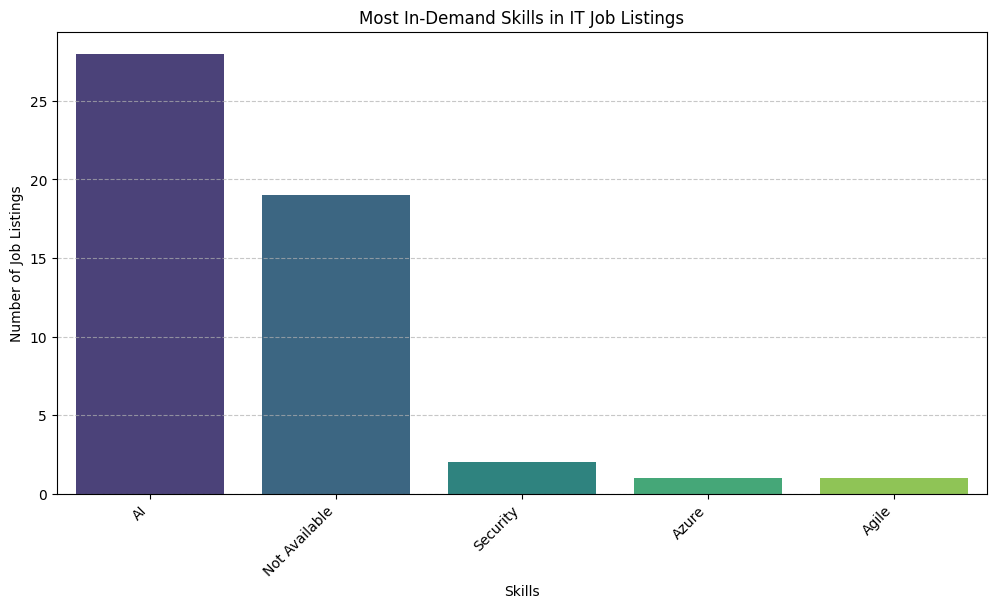

In [7]:
from collections import Counter

# Define a list of common IT skills to search for in job descriptions
kills_list = ["Python", "Java", "SQL", "Cloud Computing", "Machine Learning", "Cybersecurity", 
               "Data Analysis", "JavaScript", "DevOps", "Networking", "Linux", "Docker", "Kubernetes",
               "AWS", "Azure", "Agile", "Scrum", "C++", "React", "Django", "Flask", "TensorFlow", "Pandas",
               "AI", "Data Science", "Security", "Software Development", "Full Stack", "Back-end", 
               "Front-end", "Database", "System Administration", "Automation", "Big Data", "Microservices"]

# Function to extract skills from job descriptions
def extract_skills(description):
    found_skills = []
    for skill in skills_list:
        if skill.lower() in description.lower():
            found_skills.append(skill)
    return found_skills if found_skills else ["Not Available"]

# Apply skill extraction function to all job descriptions
df["Extracted Skills"] = df["Description"].apply(extract_skills)

# Flatten the list of skills and count occurrences
all_skills = [skill for skills in df["Extracted Skills"] for skill in skills]
skill_counts = Counter(all_skills)

# Convert to DataFrame for visualization
skills_df = pd.DataFrame(skill_counts.items(), columns=["Skill", "Count"]).sort_values(by="Count", ascending=False)
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=skills_df["Skill"], y=skills_df["Count"], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Most In-Demand Skills in IT Job Listings")
plt.xlabel("Skills")
plt.ylabel("Number of Job Listings")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()